#### Loading the data/ packages

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./Nat_Gas.csv')
df

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


### Cleaning, Preprocessing, and EDA

In [271]:
print(df.info())
print("_____________")
print(df.describe())
print("_____________")
print(df.dtypes)
df['Dates'] = pd.to_datetime(df['Dates'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes
None
_____________
          Prices
count  48.000000
mean   11.207083
std     0.757897
min     9.840000
25%    10.650000
50%    11.300000
75%    11.625000
max    12.800000
_____________
Dates      object
Prices    float64
dtype: object


/var/folders/nn/9kz8gxh905dddp63xswjzyn40000gn/T/ipykernel_2554/3252737846.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


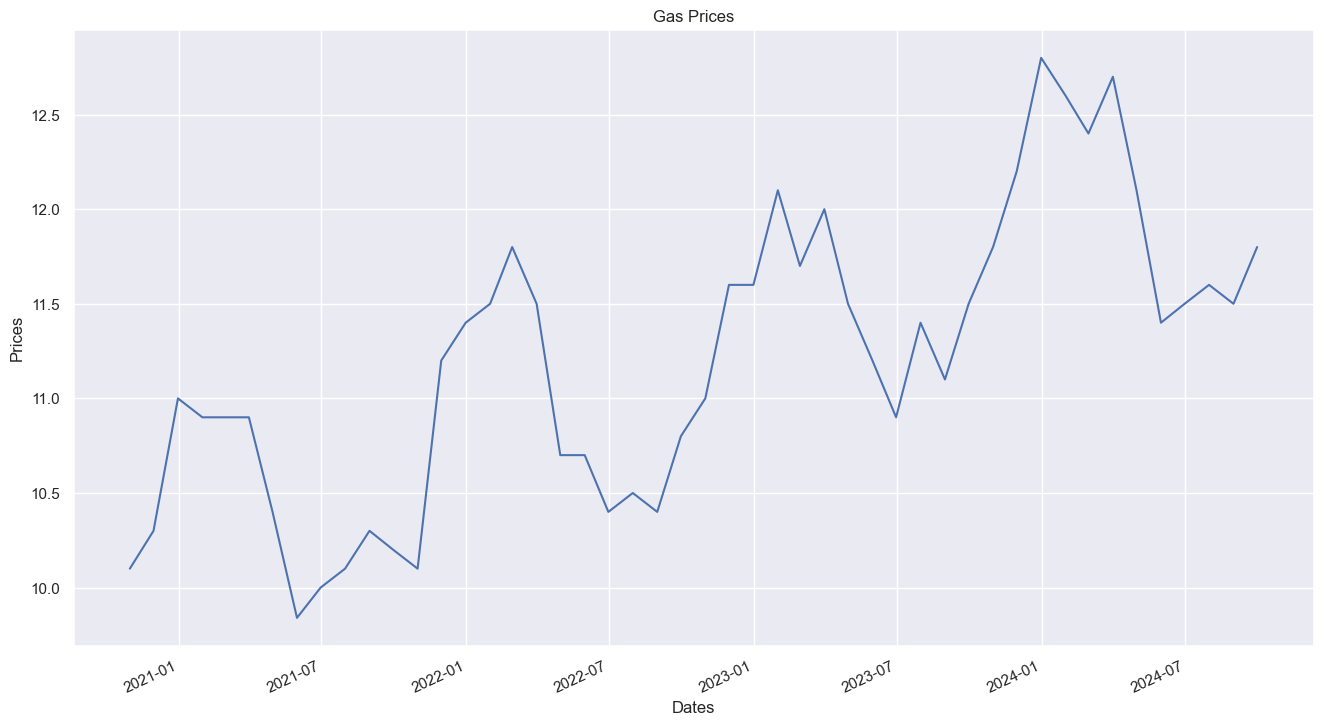

In [273]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 8))
sns.lineplot(df,x = "Dates", y = 'Prices')
plt.xticks(rotation = 25, ha = 'right')
plt.title("Gas Prices")
plt.show()

##### Plot shows a trend of increasing till hitting a max in january, and then hits a low around June-July. Based on this it might be a good idea to add a months feature.

In [ ]:
df['Month'] = df['Dates'].dt.month
df.head()

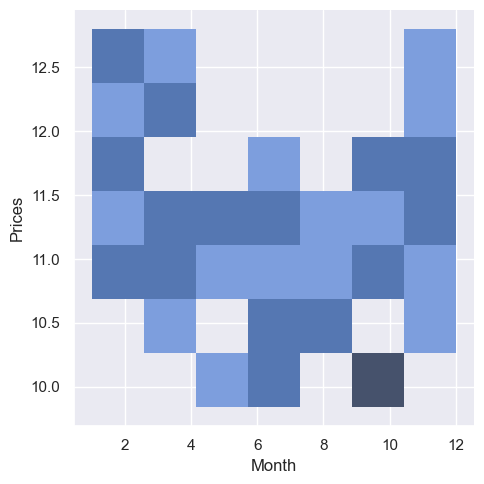

In [275]:
sns.displot(df,x = 'Month', y= 'Prices')

In [276]:
#LSTM

In [277]:
training_len = len(df)-12
training_len

36

In [278]:
#hot encoding the month
df = pd.get_dummies(df, columns=['Month'], prefix='Month')
df.head()

,Dates,Prices,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2020-10-31,10.1,False,False,False,False,False,False,False,False,False,True,False,False
1,2020-11-30,10.3,False,False,False,False,False,False,False,False,False,False,True,False
2,2020-12-31,11.0,False,False,False,False,False,False,False,False,False,False,False,True
3,2021-01-31,10.9,True,False,False,False,False,False,False,False,False,False,False,False
4,2021-02-28,10.9,False,True,False,False,False,False,False,False,False,False,False,False


In [279]:
#Scaling and createing a training data to pass to the model
from sklearn.preprocessing import MinMaxScaler
train_df = df[0:training_len]# training data with the last year cut off to be used to test accuracy later
months = [ col for col in df.columns if col.startswith("Month_")] #list comp gets list of month dummies columns
data = train_df[['Prices']+months].values #getting just the values to then scale 

scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(data)

x_train = []
y_train = []
for i in range(12,len(train_data)): # this makes the x train the previous 12 steps before the final step to be predicted in the y train
    x_train.append(train_data[i-12:i])
    y_train.append(train_data[i,0])

print(x_train)
print(y_train)


[array([[0.11504425, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ],
       [0.20353982, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.51327434, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.46902655, 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.46902655, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.46902655, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.    

In [280]:
#reshaping the data and making it an np array
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)


(24, 12, 13)


In [281]:
x_train.shape[2]

13

In [380]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV

# def for the LSTM
def create_model(layer_1=20, layer_2=10, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(layer_1, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(LSTM(layer_2, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

#keras wrapping
model = KerasRegressor(model=create_model, epochs=10, batch_size=16, verbose=0)

In [378]:
# Paramenters and Grid Search
param_grid = {
    'model__layer_1': [50,60,70,75],  
    'model__layer_2': [20, 30],       
    'model__optimizer': ['rmsprop'],                  
    'epochs': [30, 35],
    'batch_size': [16, 32]
}

GS = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  cv=3, 
                  verbose=1,
                  scoring= 'neg_root_mean_squared_error', 
                  n_jobs=-1)
GS.fit(x_train, y_train)

##### Previous Grid Searches for reference:
* 'epochs': 20,                                                             
 'model__optimizer': 'rmsprop',
 'model__layer_1': 20,
 'model__layer_2': 15
 
 *   {'batch_size': 32,
    'epochs': 20,
    'model__optimizer': 'rmsprop',
    'model__layer_1': 30,
    'model__layer_2': 15}
    '
 *   batch_size': 32,
    'epochs': 20,
    'model__optimizer': 'rmsprop',
    'model__layer_1': 40,
    'model__layer_2': 15'''

*  {'batch_size': 16,
    'epochs': 30,
    'model__optimizer': 'rmsprop',
    'model__layer_1': 40,
    'model__layer_2': 20}
*  {'batch_size': 32,
   'epochs': 35,
   'model__layer_1': 50,
   'model__layer_2': 20,
   'model__optimizer': 'rmsprop'}
*   {'batch_size': 16,
    'epochs': 30,
    'model__layer_1': 60,
    'model__layer_2': 20,
    'model__optimizer': 'rmsprop'}
*   {'batch_size': 16,
    'epochs': 35,
    'model__layer_1': 60,
    'model__layer_2': 20,
    'model__optimizer': 'rmsprop'}

In [74]:

GS.best_params_

{'batch_size': 16,
 'epochs': 35,
 'model__layer_1': 60,
 'model__layer_2': 20,
 'model__optimizer': 'rmsprop'}

In [366]:
model = create_model(layer_1=60,layer_2=20,optimizer='rmsprop')
model.fit(x_train,y_train,epochs=35,batch_size=16)

Epoch 1/35


/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3331
Epoch 2/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1197 
Epoch 3/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0517
Epoch 4/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0501
Epoch 5/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0446 
Epoch 6/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0432
Epoch 7/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0458 
Epoch 8/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0387 
Epoch 9/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0364
Epoch 10/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0325
Epoch 11/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0309
Epoch 12/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0426 
Epoch 13/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0221
Epoch 14/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0238 
Epoch 15/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0207
Epoch 16/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

In [364]:
#creating the test data same method as before
test_data = df[training_len-13: ]
test_data = test_data[['Prices']+ months ].values
test_data = scaler.fit_transform(test_data)
x_test = []
y_test = df[training_len: ].filter(['Prices']).values
for i in range(12,len(test_data)):
    x_test.append(test_data[i-12:i])
x_test

[array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
         0.  , 0.  ],
        [0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
         0.  , 0.  ],
        [0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         1.  , 0.  ],
        [0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 1.  ],
        [0.65, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.45, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.6 , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.35, 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.2 , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  ],
        [0.3 , 0.  , 0.  , 0. 

In [365]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)


(13, 12, 13)


In [371]:
predictions = model.predict(x_test)
#since there is more columns/features than just the price simply doing inverse trasnform wont work, and it is needed to fill the extra columns to match the shape expected by inverse_tranform
num_features = test_data.shape[1]  
#np zeros will make arrays of zeros with the provided shape, and hstack concates those arrays
zeros = np.zeros((predictions.shape[0], num_features-1))
#hstacking
padded_predictions = np.hstack([predictions, zeros])
#Inversing
predictions = scaler.inverse_transform(padded_predictions)[:, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [210]:
padded_predictions.shape

(12, 13)

In [251]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.078071128710723

/var/folders/nn/9kz8gxh905dddp63xswjzyn40000gn/T/ipykernel_2554/721139762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Dates'] = df['Dates']
/var/folders/nn/9kz8gxh905dddp63xswjzyn40000gn/T/ipykernel_2554/721139762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Dates'] = df['Dates']
/var/folders/nn/9kz8gxh905dddp63xswjzyn40000gn/T/ipykernel_2554/721139762.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

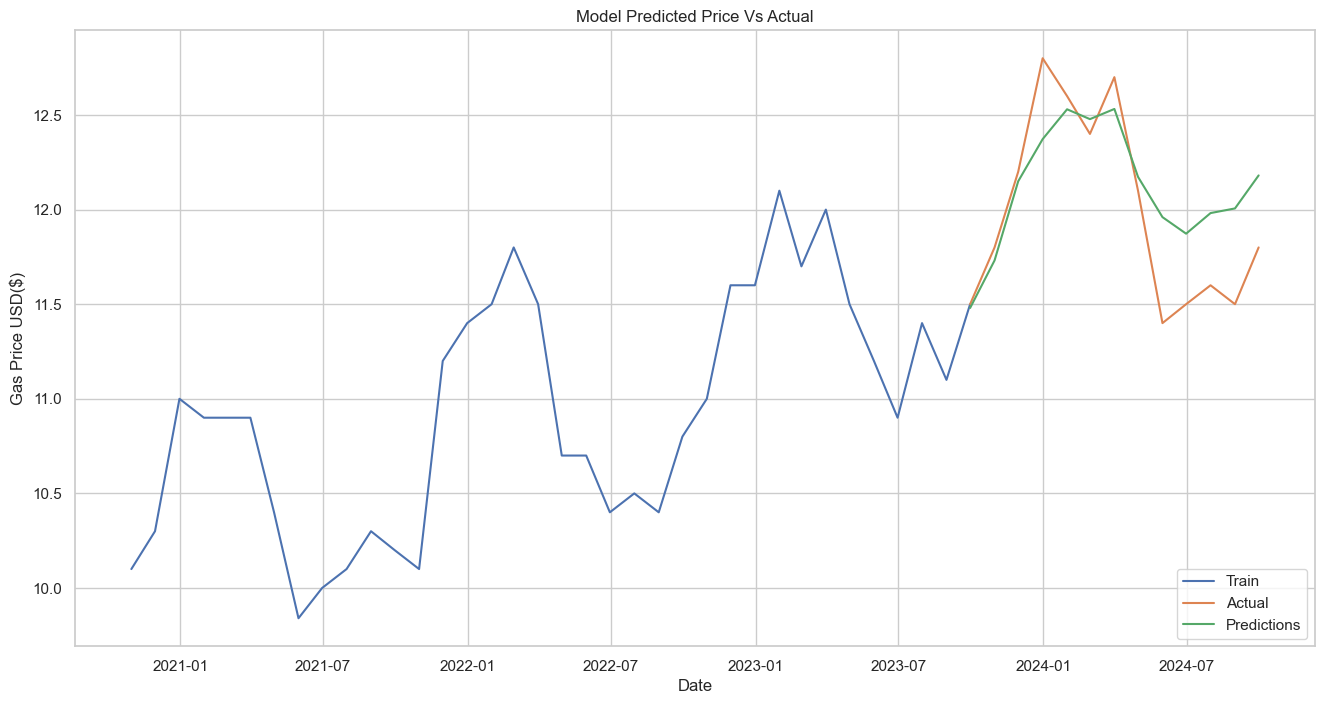

In [252]:
#Plot the data
data = df[['Prices']+months ]
#Making new dfs with the train and actual with actual containing the predictions, this way the actual price and predicted price can be viewed together
train = data[:training_len] 
train['Dates'] = df['Dates']

actual = data[training_len-1:]
actual['Dates'] = df['Dates']
actual['Predictions'] = predictions

sns.set(style='whitegrid')
#Vizulatize the data
plt.figure(figsize= (16,8))
plt.title('Model Predicted Price Vs Actual')
plt.xlabel('Date')
plt.ylabel('Gas Price USD($)')
plt.plot(train['Dates'],train['Prices'])
plt.plot(actual['Dates'],actual[['Prices','Predictions']])
plt.legend(['Train','Actual','Predictions'],loc = 'lower right')
plt.show()

#### Side by Side Price and Predictions Comparison

In [253]:
cols = ['Predictions','Dates','Prices']
price_pred = actual[cols]
price_pred

,Predictions,Dates,Prices
35,11.480014,2023-09-30,11.5
36,11.731231,2023-10-31,11.8
37,12.149752,2023-11-30,12.2
38,12.372435,2023-12-31,12.8
39,12.530221,2024-01-31,12.6
40,12.478205,2024-02-29,12.4
41,12.531938,2024-03-31,12.7
42,12.173002,2024-04-30,12.1
43,11.960237,2024-05-31,11.4
44,11.872743,2024-06-30,11.5


##### Based on the graph we can see that it follows the general trend of the data and price_pred table shows us that its off by a few cents in most cases.

### Training on All Data

In [375]:
full_data = df[['Prices']+months].values #getting just the values to then scale 
full_train = scaler.fit_transform(full_data)

x_full = []
y_full = []
for i in range(12,len(full_train)): # this makes the x train the previous 12 steps before the final step to be predicted in the y train
    x_full.append(full_train[i-12:i])
    y_full.append(full_train[i,0])
x_full

[array([[0.08783784, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        ],
        [0.15540541, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.        , 0.        ],
        [0.39189189, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.        ],
        [0.35810811, 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.35810811, 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.35810811, 0.        , 0.        , 1.        , 0.        ,
         0.

In [376]:
#reshaping the data and making it an np array
x_full, y_full = np.array(x_full), np.array(y_full)
print(x_full.shape)


(36, 12, 13)


In [381]:
#New parms for full set
param_grid2 = {
    'model__layer_1': [60,70,75,80],  
    'model__layer_2': [20,30,40,50],       
    'model__optimizer': ['rmsprop'],                  
    'epochs': [20,30,35,40],
    'batch_size': [16, 32]
}
GS = GridSearchCV(estimator=model, 
                  param_grid=param_grid2, 
                  cv=3, 
                  verbose=1,
                  scoring= 'neg_root_mean_squared_error', 
                  n_jobs=-1)
GS.fit(x_full, y_full)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/miniconda3/envs/pydata-book/lib/python3.10/site-packages/keras/src/laye

GridSearchCV(cv=3,
             estimator=KerasRegressor(batch_size=16, epochs=10, model=<function create_model at 0x179d5b0a0>, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [16, 32], 'epochs': [20, 30, 35, 40],
                         'model__layer_1': [60, 70, 75, 80],
                         'model__layer_2': [20, 30, 40, 50],
                         'model__optimizer': ['rmsprop']},
             scoring='neg_root_mean_squared_error', verbose=1)

In [382]:

GS.best_params_

{'batch_size': 16,
 'epochs': 20,
 'model__layer_1': 70,
 'model__layer_2': 20,
 'model__optimizer': 'rmsprop'}

In [383]:
#fitting on the full data
f_model = create_model(layer_1=70,layer_2=20,optimizer='rmsprop')
f_model.fit(x_full,y_full,epochs=20,batch_size=16)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0666 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0332 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0302 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0324 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0317 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0232 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0180 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0192 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0064
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━

In [384]:
full_test = df[len(df)-13: ]
full_test = full_test[['Prices']+ months ].values
full_test = scaler.fit_transform(full_test)
full_x_test = []
full_y_test = df.filter(['Prices']).values
for i in range(12,len(full_test)):
    full_x_test.append(full_test[i-12:i])
full_x_test

[array([[0.07142857, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.        ,
         0.        , 0.        , 0.        ],
        [0.28571429, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        ],
        [0.57142857, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.        , 0.        ],
        [1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.        ],
        [0.85714286, 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.71428571, 0.        , 1.        , 0.        , 0.        ,
         0.

In [385]:
full_x_test, full_y_test = np.array(full_x_test), np.array(full_y_test)
full_x_test.shape

(1, 12, 13)

## Predicting One Year Out
 To do this ill need to make a function that predicts based on the model, and then uses that prediction as a part of the next prediction. This will need to be done over the 12 time steps to forecast one year.

In [386]:
# function to predict one year out
def predict_future(f_model, full_x_test, n_steps):
    predictions = []
    for _ in range(n_steps):
        y_pred = f_model.predict(full_x_test)#making prediction
        predictions.append(y_pred[0, 0])  # appends to the predicitons list
         
         #Updating full_x_test for the next prediction
        full_x_test = np.roll(full_x_test, shift=-1, axis=1) #shifts the first value into the last spot 
        full_x_test[0, -1, 0] = y_pred  #Last spot is then replaced by the y_pred, and steps are repeated

    return np.array(predictions)

# Predict 12 months into the future
future_predictions = predict_future(f_model, full_x_test, 12)

print(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.4385773  0.5768618  0.73771757 0.82143736 0.8255116  0.78407633
 0.7299203  0.58790094 0.44574702 0.41900036 0.453005   0.46778846]


In [387]:
future_predictions.shape

(12,)

In [388]:
future_predictions_reshaped = future_predictions.reshape(-1, 1) 

num_features = full_x_test.shape[1]  
#Creating a 2D array of zeros with the same number of rows and columns like before
zeros_array = np.zeros((future_predictions_reshaped.shape[0], num_features))
#Concatenating
padded_predictions = np.hstack([future_predictions_reshaped, zeros_array])
#Inversing 
future_predictions = scaler.inverse_transform(padded_predictions)[:, 0]

In [389]:
future_predictions

array([12.01400821, 12.20760652, 12.4328046 , 12.5500123 , 12.5557162 ,
       12.49770687, 12.42188846, 12.22306131, 12.02404583, 11.9866005 ,
       12.03420698, 12.05490384])

#### Making a Dataframe with the Predictions and Dates

In [307]:
#dates
new_dates = pd.date_range(start='2024-10-30', end='2025-9-30', freq='M')
len(new_dates)

/var/folders/nn/9kz8gxh905dddp63xswjzyn40000gn/T/ipykernel_2554/2806198687.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_dates = pd.date_range(start='2024-10-30', end='2025-9-30', freq='M')


12

In [392]:
# Adding the next year of dates
df_future = pd.DataFrame({
    'Dates': new_dates,
    'LSTM Pred': future_predictions
})
df_future

,Dates,LSTM Pred
0,2024-10-31,12.014008
1,2024-11-30,12.207607
2,2024-12-31,12.432805
3,2025-01-31,12.550012
4,2025-02-28,12.555716
5,2025-03-31,12.497707
6,2025-04-30,12.421888
7,2025-05-31,12.223061
8,2025-06-30,12.024046
9,2025-07-31,11.986601


#### Dataframe above has the predicted prices for the next year.

In [393]:
#Joining the Preds with the past price data to Visualize
pred_df = pd.concat([df, df_future], ignore_index=True)
cols = ['Dates','Prices','LSTM Pred']
pred_df= pred_df[cols]

<Axes: xlabel='Dates', ylabel='Prices'>

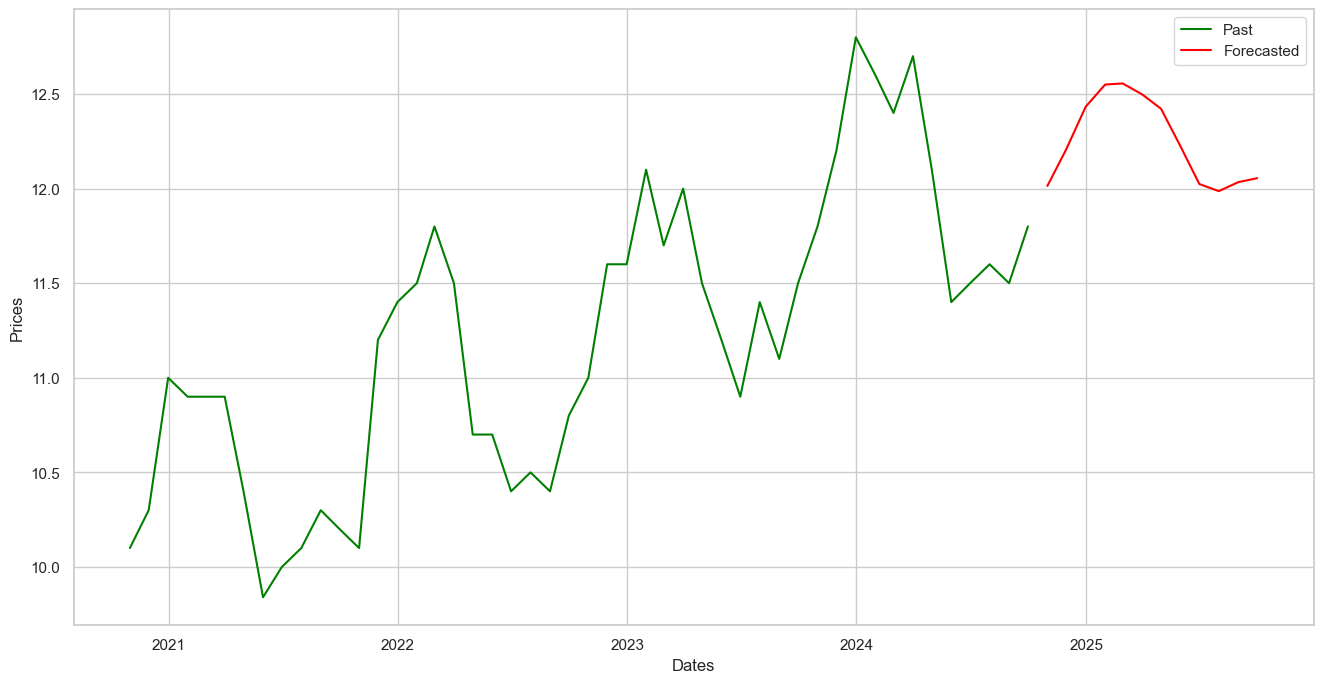

In [394]:
# Ploting
sns.set(style='whitegrid')
plt.figure(figsize= (16,8))
sns.lineplot(pred_df,x = 'Dates',y= pred_df['Prices'], color = 'green',label= 'Past')
sns.lineplot(pred_df,x = 'Dates',y= pred_df['LSTM Pred'], color = 'red',label = "Forecasted")


In [396]:
df_future.to_csv('./Predicted Gas Prices ')